In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
sales_df = pd.read_csv("C:/Users/Richard/Documents/GitHub/DataCamp/Datasets/Supervised Learning/advertising_and_sales_clean.csv")

In [3]:
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [4]:
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [5]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


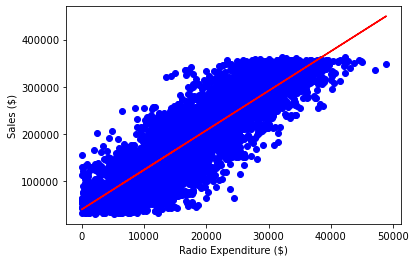

In [6]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [7]:
print(sales_df)

           tv     radio  social_media influencer      sales
0     16000.0   6566.23       2907.98       Mega   54732.76
1     13000.0   9237.76       2409.57       Mega   46677.90
2     41000.0  15886.45       2913.41       Mega  150177.83
3     83000.0  30020.03       6922.30       Mega  298246.34
4     15000.0   8437.41       1406.00      Micro   56594.18
...       ...       ...           ...        ...        ...
4541  26000.0   4472.36        717.09      Micro   94685.87
4542  71000.0  20610.69       6545.57       Nano  249101.92
4543  44000.0  19800.07       5096.19      Micro  163631.46
4544  71000.0  17534.64       1940.87      Macro  253610.41
4545  42000.0  15966.69       5046.55      Micro  148202.41

[4546 rows x 5 columns]


In [8]:
sales_df = sales_df.drop("influencer", axis=1)

In [9]:
print(sales_df)

           tv     radio  social_media      sales
0     16000.0   6566.23       2907.98   54732.76
1     13000.0   9237.76       2409.57   46677.90
2     41000.0  15886.45       2913.41  150177.83
3     83000.0  30020.03       6922.30  298246.34
4     15000.0   8437.41       1406.00   56594.18
...       ...       ...           ...        ...
4541  26000.0   4472.36        717.09   94685.87
4542  71000.0  20610.69       6545.57  249101.92
4543  44000.0  19800.07       5096.19  163631.46
4544  71000.0  17534.64       1940.87  253610.41
4545  42000.0  15966.69       5046.55  148202.41

[4546 rows x 4 columns]


In [10]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [11]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996000997
